# Pandas

Numpy objects are very efficient for working with data that has several dimensions and the same type. However, is we work with data like the one that you could have in an Excel table, we have data of the form
 - Rows with elements (e.g. people)
 - Columns with properties (e.g. age, height, name...)

These datasets are in table format and the package `pandas` focus in working out with them.

Let's import it:

In [1]:
import pandas as pd

## Upload files

We can upload files that are made for storing data as `.csv`, `.txt` or even `.xsl` files (you need some additional packages for this one).

For example, let's upload the `data.csv` file. If we have a look at it we will see that the first column has the names of the properties and that the data is separated by commas. 

We can use now the `pandas.read_csv` function to load it:

In [2]:
d = pd.read_csv("data.csv",sep=",")
d

,x,y,size,color
0,0.690908,0.772151,5,red
1,0.782319,0.841711,10,blue
2,0.925735,0.950798,5,red
3,0.116696,0.166198,1,red
4,0.944515,1.002926,1,red
...,...,...,...,...
995,0.018881,0.072454,5,blue
996,0.036489,0.038360,10,blue
997,0.979937,0.997538,5,red
998,0.111819,0.183948,10,blue


We can check the formats of each column,

In [3]:
d.dtypes

x        float64
y        float64
size       int64
color     object
dtype: object

And the shape of the table,

In [4]:
d.shape

(1000, 4)

You can get the name of the columns

In [5]:
d.columns

Index(['x', 'y', 'size', 'color'], dtype='object')

and indices

In [6]:
d.index

RangeIndex(start=0, stop=1000, step=1)

## Accessing the data from a DataFrame

You can access a DataFrame object by column:

In [7]:
d["color"]

0       red
1      blue
2       red
3       red
4       red
       ... 
995    blue
996    blue
997     red
998    blue
999     red
Name: color, Length: 1000, dtype: object

In [8]:
d[["color","x"]]

,color,x
0,red,0.690908
1,blue,0.782319
2,red,0.925735
3,red,0.116696
4,red,0.944515
...,...,...
995,blue,0.018881
996,blue,0.036489
997,red,0.979937
998,blue,0.111819


Slicing it using the methods:

 - `DataFrame.loc` and give the name of the indexes and columns to extract 
 - `Dataframe.iloc` and give the position of the indexes and columns as a matrix positions

In [9]:
d.loc[[1,3,4],["size","color"]]

,size,color
1,10,blue
3,1,red
4,1,red


In [10]:
d.iloc[1:4,[0,1]]

,x,y
1,0.782319,0.841711
2,0.925735,0.950798
3,0.116696,0.166198


or giving a boolean array in a very similar way to numpy arrays

In [11]:
get = d["color"] == "red"

d.loc[get,["x","y","color"]]

,x,y,color
0,0.690908,0.772151,red
2,0.925735,0.950798,red
3,0.116696,0.166198,red
4,0.944515,1.002926,red
5,0.187152,0.200097,red
...,...,...,...
988,0.290339,0.327376,red
992,0.011615,0.042034,red
994,0.816584,0.871884,red
997,0.979937,0.997538,red


and you can get the numpy array matrix of the dataframe at any point by calling the method `values`.

In [12]:
d.values

array([[0.690907632780836, 0.7721505346460712, 5, 'red'],
       [0.7823193350095718, 0.8417111928393948, 10, 'blue'],
       [0.9257350388045036, 0.9507975040319092, 5, 'red'],
       ...,
       [0.9799368676973442, 0.9975377075137878, 5, 'red'],
       [0.1118194605811619, 0.1839481814555008, 10, 'blue'],
       [0.0179776606164256, 0.1129177328017267, 10, 'red']], dtype=object)

## Operate with the DataFrame

Pandas have many implemented functions to already work and analyze the data.

Pot example, let's make check some statistics.

In [13]:
d.mean()

x       0.506637
y       0.556973
size    5.385000
dtype: float64

In [14]:
d.std()

x       0.290625
y       0.292242
size    3.697357
dtype: float64

and you can group by certain property

In [15]:
d.groupby("color").mean()

,x,y,size
color,,,
blue,0.510904,0.561445,5.224900
red,0.502404,0.552536,5.543825


In [16]:
d.groupby("color").std()

,x,y,size
color,,,
blue,0.294451,0.295433,3.727869
red,0.287011,0.289267,3.663636


## Interoperability with seaborn

As already mentioned when talking about plotting, seaborn and pandas are very well connected in the sense that you can provide a dataframe to a seaborn plotting function directly to make the plots.

See some examples:

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

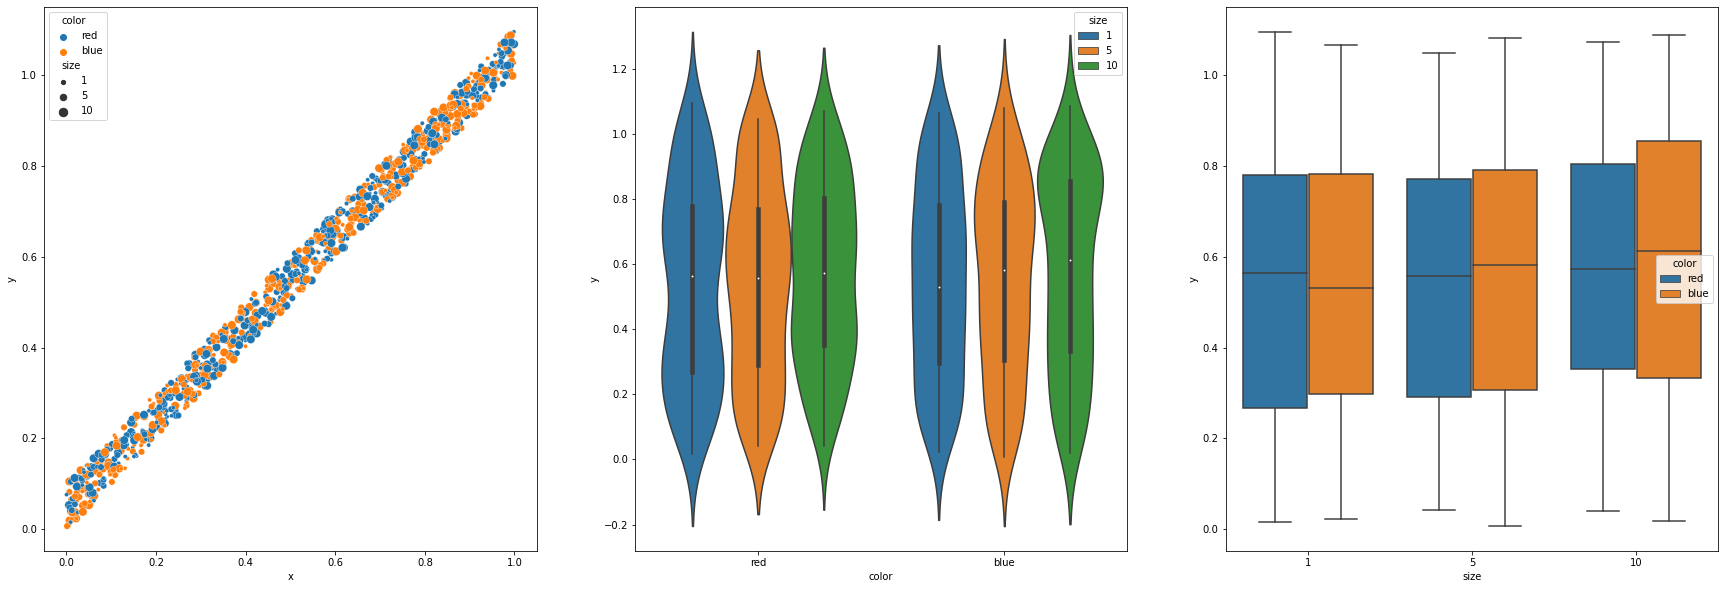

In [18]:
fig,ax = plt.subplots(1,3,figsize=[30,10])

sns.scatterplot(data=d,x="x",y="y",hue="color",size="size",ax=ax[0])
sns.violinplot(data=d,x="color",y="y",hue="size",ax=ax[1])
sns.boxplot(data=d,x="size",y="y",hue="color",ax=ax[2]);

## Construct a DataFrame

You can construct an empty DataFrame.

In [19]:
d = pd.DataFrame()

and fill it with data adding columns

In [20]:
d["names"] = ["Paco","Helena","Sofia"]
d["age"] = [40,67,70]

or rows

In [21]:
d.loc[len(d),:] = ["Fede",34]
d

,names,age
0,Paco,40.0
1,Helena,67.0
2,Sofia,70.0
3,Fede,34.0


and you can append other DataFrames of the same type

In [22]:
d2 = pd.DataFrame()

d2["names"] = ["Selena","Aitor"]
d2["age"] = [27,56]

In [23]:
dAdd = d.append(d2)
dAdd

,names,age
0,Paco,40.0
1,Helena,67.0
2,Sofia,70.0
3,Fede,34.0
0,Selena,27.0
1,Aitor,56.0


## Reformat the type of the columns

You can also reformat the type of columns.

In [24]:
dAdd["age"] = dAdd["age"].astype(int)
dAdd

,names,age
0,Paco,40
1,Helena,67
2,Sofia,70
3,Fede,34
0,Selena,27
1,Aitor,56


## Save DataFrames

The dataset is straightforward to save using the method `DataFrame.to_X`, with `X` being a format to save.

In [25]:
dAdd.to_csv("new_dataset.csv")

# Summary

By now, you should have learned:

 - Pandas is a package to manipulate and work with data tables.
 - How to load data.
 - How to access the data.
 - How to make basic operations in the data.
 - How to use seaborn in combination with pandas.
 - Construct new DataFrames.
 - Save DataFrames.